In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [2]:
df=pd.read_excel('NUAR-B_08_04_2025-11_26_21_CONVERTIO.xlsx',parse_dates=["DATE/TIME(America/Asuncion)"])

In [3]:
df

,DATE/TIME(America/Asuncion),Flow Rate Prop. BR,Flow Rate Prop. CNT,Flow Rate Prop. STB,Trip Volume Prop. BR,Trip Volume Prop. CNT,Trip Volume Prop. STB,Flow Rate Gen. 1,Flow Rate Gen. 2,Trip Volume Gen. 1,...,% Carga Motor Gen. 1,% Carga Motor Gen. 2,Voltaje Alt. Prop. BR,Voltaje Alt. Prop. CNT,Voltaje Alt. Prop. STB,Voltaje Alt. Gen. 1,Voltaje Alt. Gen. 2,TK Gen. Aux,Flow Rate Gen. Aux,Trip Volume Gen. Aux
0,2025-01-04 11:26:37,NaN,NaN,NaN,361667.658499,335968.958002,327010.739697,6.7,0.0,1491,...,0,0,NaN,NaN,NaN,0,0,819.0840,0,62
1,2025-01-04 11:36:46,NaN,NaN,NaN,361667.658499,335968.958002,327010.739697,6.3,0.0,1492,...,0,0,NaN,NaN,NaN,0,0,819.0840,0,62
2,2025-01-04 11:46:46,NaN,NaN,NaN,361667.658499,335968.958002,327010.739697,6.2,0.0,1493,...,0,0,NaN,NaN,NaN,0,0,814.9680,0,62
3,2025-01-04 11:56:46,NaN,NaN,NaN,361667.658499,335968.958002,327010.739697,6.5,0.0,1494,...,0,0,NaN,NaN,NaN,0,0,814.9680,0,62
4,2025-01-04 12:06:46,NaN,NaN,NaN,361667.658499,335968.958002,327010.739697,6.5,0.0,1495,...,0,0,NaN,NaN,NaN,0,0,814.9680,0,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,2025-08-04 09:28:53,222.5,225.5,207.8,377253.000000,350692.000000,341220.000000,0.0,8.5,1905,...,0,0,24.65,24.35,24.65,0,0,810.6462,0,62
973,2025-08-04 09:39:23,226.1,224.9,210.6,377294.000000,350734.000000,341258.000000,0.0,7.7,1905,...,0,0,24.60,24.35,24.65,0,0,814.9680,0,62
974,2025-08-04 09:49:53,219.6,218.8,214.7,377332.000000,350771.000000,341293.000000,0.0,9.5,1905,...,0,0,24.55,24.35,24.60,0,0,814.9680,0,62
975,2025-08-04 09:59:21,227.1,223.8,210.3,377369.000000,350808.000000,341327.000000,0.0,8.4,1905,...,0,0,24.65,24.35,24.65,0,0,814.9680,0,62


In [4]:
len(df.columns)

71

In [5]:
# Extraemos los componentes

df['dia'] = df['DATE/TIME(America/Asuncion)'].dt.day
df['mes'] = df['DATE/TIME(America/Asuncion)'].dt.month
df['año'] = df['DATE/TIME(America/Asuncion)'].dt.year
df['hora'] = df['DATE/TIME(America/Asuncion)'].dt.hour
df['minuto'] = df['DATE/TIME(America/Asuncion)'].dt.minute
df['segundo'] = df['DATE/TIME(America/Asuncion)'].dt.second

In [6]:
df.isna().sum()

DATE/TIME(America/Asuncion)      0
Flow Rate Prop. BR             344
Flow Rate Prop. CNT            344
Flow Rate Prop. STB            344
Trip Volume Prop. BR             0
                              ... 
mes                              0
año                              0
hora                             0
minuto                           0
segundo                          0
Length: 77, dtype: int64

In [7]:
len(df.columns)

77

In [8]:
df=df.drop('DATE/TIME(America/Asuncion)',axis=1)

# Definir variables de entrada y salida
X = df.drop(columns=["Flow Rate Prop. BR", "Flow Rate Prop. STB"])
feature_names=X.columns
y_BR = df["Flow Rate Prop. BR"]
y_STB = df["Flow Rate Prop. STB"]

In [44]:
len(X.columns)

74

In [10]:
# Manejar valores nulos con la mediana
imputer = SimpleImputer(strategy="median")
# df=imputer.fit_transform(df)

X_imputed = imputer.fit_transform(X)

# 4. Volver a convertir a DataFrame si querés conservar nombres
X_imputed = pd.DataFrame(X_imputed, columns=feature_names)

y_BR = imputer.fit_transform(y_BR.to_frame())
y_STB = imputer.fit_transform(y_STB.to_frame())

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor, Pool

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train_BR, y_test_BR = train_test_split(X_imputed, y_BR, test_size=0.5, random_state=42)
X_train, X_test, y_train_STB, y_test_STB = train_test_split(X_imputed, y_STB, test_size=0.5, random_state=42)

# # Entrenar modelos de regresión lineal
# model_BR = LinearRegression()

# model_BR=RandomForestRegressor(n_jobs=-1, random_state=42)

# model_BR = GradientBoostingRegressor()

model_BR = CatBoostRegressor(verbose=0) 

model_BR.fit(X_train, y_train_BR.ravel())

# model_STB = LinearRegression()

# model_STB=RandomForestRegressor(n_jobs=-1,random_state=42)

# model_STB = GradientBoostingRegressor()

model_STB = CatBoostRegressor(verbose=0) 

model_STB.fit(X_train, y_train_STB.ravel())

# Predicciones en el conjunto de prueba
y_pred_BR = model_BR.predict(X_test)
y_pred_STB = model_STB.predict(X_test)

# Cálculo de métricas para Flow Rate Prop. BR
mae_BR = mean_absolute_error(y_test_BR, y_pred_BR)
mse_BR = mean_squared_error(y_test_BR, y_pred_BR)
rmse_BR = np.sqrt(mse_BR)
r2_BR = r2_score(y_test_BR, y_pred_BR)

# Cálculo de métricas para Flow Rate Prop. STB
mae_STB = mean_absolute_error(y_test_STB, y_pred_STB)
mse_STB = mean_squared_error(y_test_STB, y_pred_STB)
rmse_STB = np.sqrt(mse_STB)
r2_STB = r2_score(y_test_STB, y_pred_STB)

# Mostrar resultados
print("**Errores para Flow Rate Prop. BR:**")
print(f"MAE: {mae_BR:.2f}")
print(f"MSE: {mse_BR:.2f}")
print(f"RMSE: {rmse_BR:.2f}")
print(f"R²: {r2_BR:.4f}\n")

print("**Errores para Flow Rate Prop. STB:**")
print(f"MAE: {mae_STB:.2f}")
print(f"MSE: {mse_STB:.2f}")
print(f"RMSE: {rmse_STB:.2f}")
print(f"R²: {r2_STB:.4f}")


**Errores para Flow Rate Prop. BR:**
MAE: 3.06
MSE: 70.12
RMSE: 8.37
R²: 0.9849

**Errores para Flow Rate Prop. STB:**
MAE: 2.74
MSE: 46.67
RMSE: 6.83
R²: 0.9882


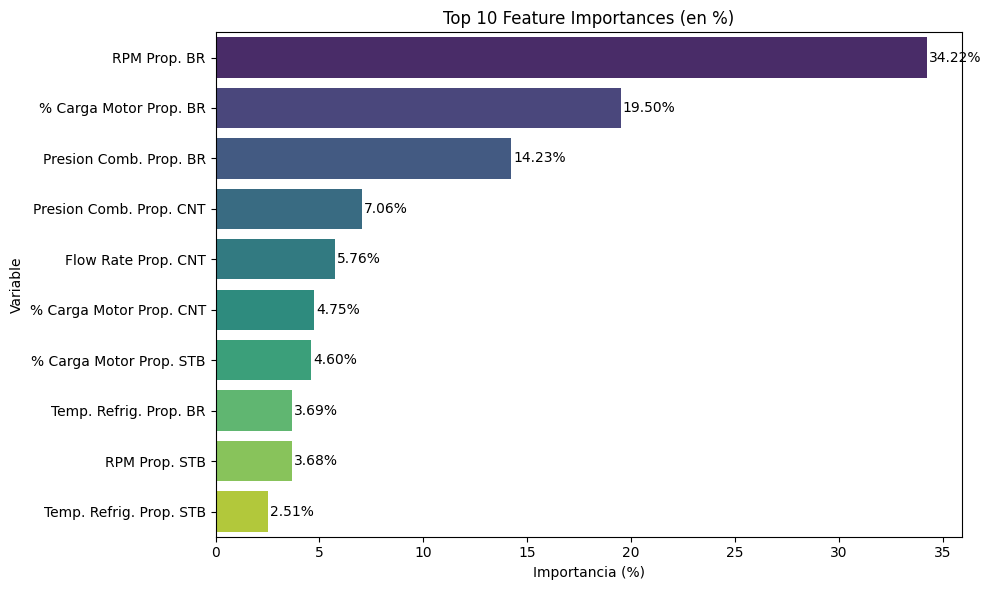

In [13]:
# VER SOLO LOS 10 MAS IMPORTANTES SEGUN CATBOOS

# Obtener las importancias y nombres
feature_importance = model_BR.get_feature_importance()
feature_names = X.columns

# Crear DataFrame ordenado
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Tomar las 10 principales
top10 = importance_df.head(10)

# Crear una copia explícita de top10 para evitar problemas
top10_copy = top10.copy()

# Agregar columna de porcentaje
total_importance = top10_copy['Importance'].sum()
top10_copy['Percentage'] = (top10_copy['Importance'] / total_importance) * 100

# Crear el gráfico
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Percentage', y='Feature', data=top10_copy, hue='Feature', palette='viridis', legend=False)
plt.title('Top 10 Feature Importances (en %)')
plt.xlabel('Importancia (%)')
plt.ylabel('Variable')

# Agregar texto con el valor porcentual
for i, (pct, feature) in enumerate(zip(top10_copy['Percentage'], top10_copy['Feature'])):
    ax.text(pct + 0.1, i, f"{pct:.2f}%", va='center')

plt.tight_layout()
plt.show()


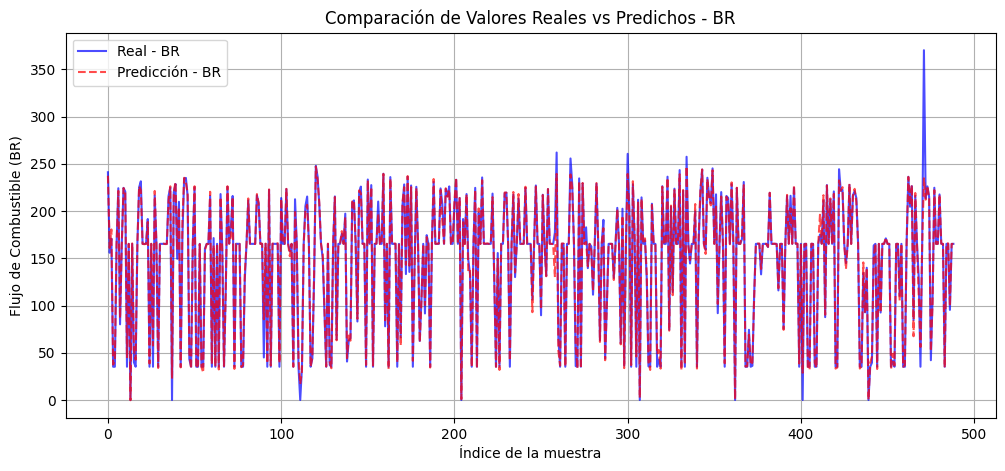

In [14]:
plt.figure(figsize=(12, 5))

# Graficar valores reales
plt.plot(y_test_BR, label="Real - BR", linestyle="-", color="blue", alpha=0.7)

# Graficar predicciones
plt.plot(y_pred_BR, label="Predicción - BR", linestyle="--", color="red", alpha=0.7)

plt.xlabel("Índice de la muestra")
plt.ylabel("Flujo de Combustible (BR)")
plt.title("Comparación de Valores Reales vs Predichos - BR")
plt.legend()
plt.grid()
plt.show()

In [15]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

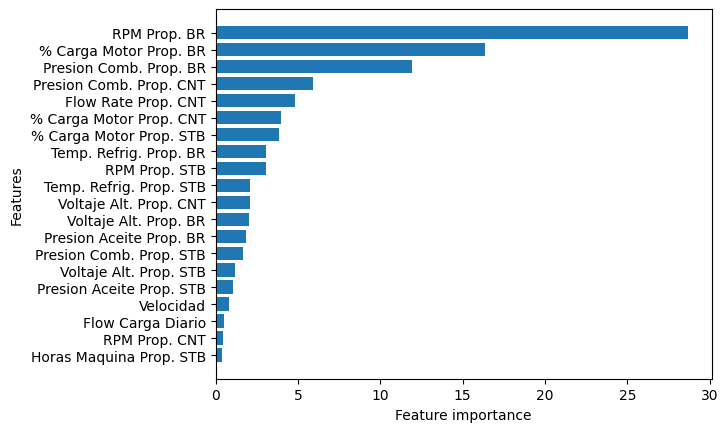

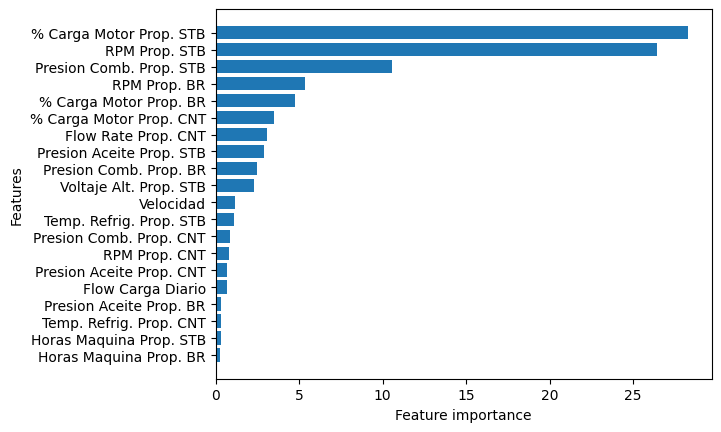

In [16]:
plot_features(feature_names, model_BR.feature_importances_)
plot_features(feature_names, model_STB.feature_importances_)

In [17]:
from sklearn.tree import DecisionTreeRegressor

# Modelo para Flow Rate Prop. BR
model_tree_BR = DecisionTreeRegressor(max_depth=5, random_state=42)
model_tree_BR.fit(X_train, y_train_BR)

# Modelo para Flow Rate Prop. STB
model_tree_STB = DecisionTreeRegressor(max_depth=5, random_state=42)
model_tree_STB.fit(X_train, y_train_STB)

# Predicciones en el conjunto de prueba
y_pred_BR = model_tree_BR.predict(X_test)
y_pred_STB = model_tree_STB.predict(X_test)

# Cálculo de métricas para Flow Rate Prop. BR
mae_BR = mean_absolute_error(y_test_BR, y_pred_BR)
mse_BR = mean_squared_error(y_test_BR, y_pred_BR)
rmse_BR = np.sqrt(mse_BR)
r2_BR = r2_score(y_test_BR, y_pred_BR)

# Cálculo de métricas para Flow Rate Prop. STB
mae_STB = mean_absolute_error(y_test_STB, y_pred_STB)
mse_STB = mean_squared_error(y_test_STB, y_pred_STB)
rmse_STB = np.sqrt(mse_STB)
r2_STB = r2_score(y_test_STB, y_pred_STB)

# Mostrar resultados
print("**Errores para Flow Rate Prop. BR:**")
print(f"MAE: {mae_BR:.2f}")
print(f"MSE: {mse_BR:.2f}")
print(f"RMSE: {rmse_BR:.2f}")
print(f"R²: {r2_BR:.4f}\n")

print("**Errores para Flow Rate Prop. STB:**")
print(f"MAE: {mae_STB:.2f}")
print(f"MSE: {mse_STB:.2f}")
print(f"RMSE: {rmse_STB:.2f}")
print(f"R²: {r2_STB:.4f}")

**Errores para Flow Rate Prop. BR:**
MAE: 2.53
MSE: 70.69
RMSE: 8.41
R²: 0.9847

**Errores para Flow Rate Prop. STB:**
MAE: 2.73
MSE: 66.36
RMSE: 8.15
R²: 0.9832


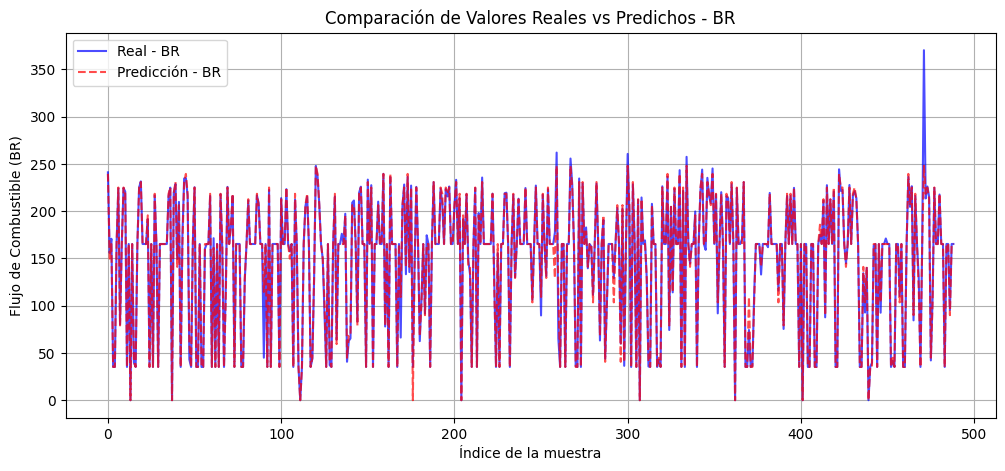

In [18]:
plt.figure(figsize=(12, 5))

# Graficar valores reales
plt.plot(y_test_BR, label="Real - BR", linestyle="-", color="blue", alpha=0.7)

# Graficar predicciones
plt.plot(y_pred_BR, label="Predicción - BR", linestyle="--", color="red", alpha=0.7)

plt.xlabel("Índice de la muestra")
plt.ylabel("Flujo de Combustible (BR)")
plt.title("Comparación de Valores Reales vs Predichos - BR")
plt.legend()
plt.grid()
plt.show()

In [19]:
from sklearn.preprocessing import StandardScaler
# Normalizar los datos
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Definir la arquitectura de la red neuronal
model_BR = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # Capa oculta 1
    layers.Dense(64, activation='relu'),  # Capa oculta 2
    layers.Dense(32, activation='relu'),  # Capa oculta 3
    layers.Dense(16, activation='relu'),
    layers.Dense(1)  # Capa de salida (predicción)
])

model_STB=keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # Capa oculta 1
    layers.Dense(64, activation='relu'),  # Capa oculta 2
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),  # Capa oculta 3
    layers.Dense(1)  # Capa de salida (predicción)
])

# Compilar el modelo
model_BR.compile(optimizer='adam', loss='mse', metrics=['mae'])
model_STB.compile(optimizer='adam', loss='mse', metrics=['mae'])


2025-04-21 11:28:05.642144: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-21 11:28:06.158289: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745245686.344120    2073 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745245686.398539    2073 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745245686.834405    2073 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [21]:
history_BR = model_BR.fit(X_train_scaled, y_train_BR, 
                          validation_data=(X_test_scaled, y_test_BR),
                          epochs=40, batch_size=16, verbose=0)

history_STB=model_STB.fit(X_train_scaled, y_train_STB, 
                          validation_data=(X_test_scaled, y_test_STB),
                          epochs=40, batch_size=16, verbose=0)

I0000 00:00:1745245698.912938    2350 service.cc:152] XLA service 0x7f288c0070f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1745245698.913014    2350 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2025-04-21 11:28:18.964526: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
E0000 00:00:1745245699.251993    2350 cuda_dnn.cc:522] Loaded runtime CuDNN library: 9.1.0 but source was compiled with: 9.3.0.  CuDNN library needs to have matching major version and equal or higher minor version. If using a binary install, upgrade your CuDNN library.  If building from sources, make sure the library loaded at runtime is compatible with the version specified during compile configuration.
E0000 00:00:1745245699.295663    2350 cuda_dnn.cc:522] Loaded runtime CuDNN library: 9.1.0 but s

FailedPreconditionError: Graph execution error:

Detected at node StatefulPartitionedCall defined at (most recent call last):
  File "/home/oayala65/anaconda3/envs/py310/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/home/oayala65/anaconda3/envs/py310/lib/python3.10/runpy.py", line 86, in _run_code

  File "/home/oayala65/anaconda3/envs/py310/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/home/oayala65/anaconda3/envs/py310/lib/python3.10/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/home/oayala65/anaconda3/envs/py310/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/home/oayala65/anaconda3/envs/py310/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/home/oayala65/anaconda3/envs/py310/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/home/oayala65/anaconda3/envs/py310/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/home/oayala65/anaconda3/envs/py310/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/home/oayala65/anaconda3/envs/py310/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue

  File "/home/oayala65/anaconda3/envs/py310/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 534, in process_one

  File "/home/oayala65/anaconda3/envs/py310/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/home/oayala65/anaconda3/envs/py310/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 362, in execute_request

  File "/home/oayala65/anaconda3/envs/py310/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 778, in execute_request

  File "/home/oayala65/anaconda3/envs/py310/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 449, in do_execute

  File "/home/oayala65/anaconda3/envs/py310/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/home/oayala65/anaconda3/envs/py310/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3075, in run_cell

  File "/home/oayala65/anaconda3/envs/py310/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3130, in _run_cell

  File "/home/oayala65/anaconda3/envs/py310/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 128, in _pseudo_sync_runner

  File "/home/oayala65/anaconda3/envs/py310/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3334, in run_cell_async

  File "/home/oayala65/anaconda3/envs/py310/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3517, in run_ast_nodes

  File "/home/oayala65/anaconda3/envs/py310/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code

  File "/tmp/ipykernel_2073/2645596395.py", line 1, in <module>

  File "/home/oayala65/anaconda3/envs/py310/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/oayala65/anaconda3/envs/py310/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 371, in fit

  File "/home/oayala65/anaconda3/envs/py310/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 219, in function

  File "/home/oayala65/anaconda3/envs/py310/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 132, in multi_step_on_iterator

DNN library initialization failed. Look at the errors above for more details.
	 [[{{node StatefulPartitionedCall}}]] [Op:__inference_multi_step_on_iterator_2052]

In [ ]:
loss, mae_BR = model_BR.evaluate(X_test_scaled, y_test_BR)
loss, mae_STB = model_BR.evaluate(X_test_scaled, y_test_STB)
print(f"MAE_BR en test: {mae_BR:.2f}")
print(f"MAE en test: {mae_STB:.2f}")

In [ ]:
plt.figure(figsize=(8, 5))

# Pérdida (Loss) para BR
plt.plot(history_BR.history['loss'], label='Loss - BR (Entrenamiento)', color='blue')
plt.plot(history_BR.history['val_loss'], label='Loss - BR (Validación)', color='blue', linestyle="--")

# Pérdida (Loss) para STB
plt.plot(history_STB.history['loss'], label='Loss - STB (Entrenamiento)', color='green')
plt.plot(history_STB.history['val_loss'], label='Loss - STB (Validación)', color='green', linestyle="--")

plt.xlabel("Épocas")
plt.ylabel("Pérdida (MSE)")
plt.title("Evolución del Error (Loss) - BR vs STB")
plt.legend()
plt.grid()
plt.show()